In [7]:
from pathlib import Path
from analysis_funcs import gateData, getTomos, IFs, fidelityCurve, fidelityCurve_noise, IFs_gaussianNoise, plotPTMMap, plotPTMMap_theory
import matplotlib.pyplot as plt
import numpy as np
import csv

%matplotlib inline

# User Parameters

Combinations for data used in the two-qubit paper are:

gateName = 'CNOT', rabiStrengthMHz = 7.5, 12
gateName = 'SWAP', rabiStrengthMHz = 7.5, 10
gateName = 'sqrtSWAP', rabiStrengthMHz = 10

# Analysis

In [5]:
def expLocation(gateName, rabiStrengthMHz):
    if gateName == 'CNOT':
        date = '2022-03-11_0'
        if rabiStrengthMHz == 7.5:
            basePath = Path('.') / 'ExpData' / gateName / (str(rabiStrengthMHz)+'MHz') / '20Points' / 'gateData_allRepeats'
        elif rabiStrengthMHz == 12:
            basePath = Path('.') / 'ExpData' / gateName / (str(rabiStrengthMHz)+'MHz') / '20Points'
    elif gateName == 'SWAP':
        basePath = Path('.') / 'ExpData' / gateName / (str(rabiStrengthMHz)+'MHz') / '20Points'
        if rabiStrengthMHz == 7.5:
            date = '2022-03-12_0'
        elif rabiStrengthMHz == 10:
            date = '2022-03-26_0'
    elif gateName == 'sqrtSWAP':
        basePath = Path('.') / 'ExpData' / gateName / (str(rabiStrengthMHz)+'MHz') / '20Points'
        if rabiStrengthMHz == 10:
            date = '2022-05-07_0'
    return date, basePath

def analyze(gateName, rabiStrengthMHz, gateIndices):

    date, basePath = expLocation(gateName, rabiStrengthMHz)
    gateDataVals = gateData(gateName, basePath, date, gateIndices)
    tomos = getTomos(basePath, date, gateIndices, gateDataVals)

    IFdict = IFs(basePath, date, gateIndices, gateDataVals, tomos)
    SLIndex = min([i for i, val in enumerate(IFdict['G_IF_Theory_TheoryGate']) if val < 0.01])

    print(gateName)
    # plotPTMMap(tomos[SLIndex])
    # plt.savefig(gateName + '_' + str(round(rabiStrengthMHz/2, 2)) + 'SL_PTM.png', format='png', dpi=600,
    #             bbox_inches='tight')
    # plotPTMMap_theory(gateDataVals)
    # plt.savefig(gateName + '_' + str(round(rabiStrengthMHz/2, 2)) + 'Theory_PTM.png', format='png', dpi=600,
    #             bbox_inches='tight')

    # print("Purity: ", tomos[SLIndex].purity)
    # print('Speed limit index:', SLIndex)
    # print('Speed limit gate time:', gateDataVals['G_T_theory'][SLIndex])
    # print('Optimizer/gate fidelity at SL:', 1-IFdict['G_IF_Theory_TheoryGate'][SLIndex])
    # print('Exp/gate fidelity at SL:', 1-IFdict['G_IF_Exp_TheoryGate'][SLIndex])
    # print(gateDataVals['G_T_theory'])
    # print(1-IFdict['G_IF_Theory_TheoryGate'][10], 1-IFdict['G_IF_Exp_TheoryGate'][10])
    # print(1-IFdict['G_IF_Theory_TheoryGate'][14], 1-IFdict['G_IF_Exp_TheoryGate'][14])
    # fidelityCurve(gateName, rabiStrengthMHz, gateDataVals, IFdict)
    # IFdict_noise = IFs_gaussianNoise(basePath, date, gateIndices, gateDataVals, tomos, numNoiseTrials=1)
    # print(IFdict_noise['G_IF_Exp_TheoryGate_Mean'])
    # print(IFdict_noise['G_IF_Exp_TheoryGate_STD'])

    traceData = [['T', 'Exp Trace']]\
                +[[str(round(i,5)) for i in [gateDataVals['G_T_theory'][i],
                                             tomos[i].R_mle.trace()]]
                             for i in range(len(gateDataVals['G_T_theory']))]
    np.savetxt(gateName + '_' + str(rabiStrengthMHz) + 'MHz_traces.csv', traceData, delimiter=",", fmt='%s')

    purityData = [['T', 'Exp Purity']]\
                +[[str(round(i,5)) for i in [gateDataVals['G_T_theory'][i],
                                             tomos[i].purity]]
                             for i in range(len(gateDataVals['G_T_theory']))]
    np.savetxt(gateName + '_' + str(rabiStrengthMHz) + 'MHz_purities.csv', purityData, delimiter=",", fmt='%s')


    # saveData = [['T', 'F Optimizer/gate', 'F Exp/gate mean', 'F Exp/gate std', 'Exp Purity']]\
    #            +[[str(round(i,5)) for i in [gateDataVals['G_T_theory'][i],
    #                                         1-IFdict['G_IF_Theory_TheoryGate'][i],
    #                                         1-IFdict_noise['G_IF_Exp_TheoryGate_Mean'][i],
    #                                         IFdict_noise['G_IF_Exp_TheoryGate_STD'][i],
    #                                         tomos[i].purity]]
    #              for i in range(len(gateDataVals['G_T_theory']))]
    #
    # np.savetxt(gateName + '_' + str(rabiStrengthMHz) + 'MHz_curveData.csv', saveData, delimiter=",", fmt='%s')
    # fidelityCurve_noise(gateName, rabiStrengthMHz, gateDataVals, IFdict, IFdict_noise)
    # 1-np.mean(IFdict['G_IF_Exp_Theory'])

In [6]:
exps = [['CNOT', 12], ['SWAP', 10], ['sqrtSWAP', 10]]

for exp in exps:
    analyze(exp[0], exp[1], range(20))

CNOT
SWAP
sqrtSWAP


[[0.0, 0.7, 0.70296, 0.0, 0.9991], [0.07895, 0.7249, 0.72399, 0.0, 1.0014], [0.15789, 0.73762, 0.72428, 0.0, 0.96726], [0.23684, 0.75107, 0.73259, 0.0, 0.96472], [0.31579, 0.77239, 0.77048, 0.0, 0.99515], [0.39474, 0.79909, 0.78332, 0.0, 0.97267], [0.47368, 0.82757, 0.79745, 0.0, 0.96715], [0.55263, 0.85568, 0.81304, 0.0, 0.95802], [0.63158, 0.88403, 0.83775, 0.0, 0.97994], [0.71053, 0.91192, 0.85109, 0.0, 0.94705], [0.78947, 0.93782, 0.90124, 0.0, 0.96575], [0.86842, 0.95871, 0.91746, 0.0, 0.97857], [0.94737, 0.97612, 0.91954, 0.0, 0.97786], [1.02632, 0.98915, 0.95348, 0.0, 0.9717], [1.10526, 0.99757, 0.95838, 0.0, 0.96267], [1.18421, 0.99994, 0.96298, 0.0, 0.97379], [1.26316, 0.99966, 0.97981, 0.0, 0.99879], [1.34211, 0.99853, 0.91598, 0.0, 0.9896], [1.42105, 0.99999, 0.96121, 0.0, 0.97947], [1.5, 0.99883, 0.94505, 0.0, 0.97792]]


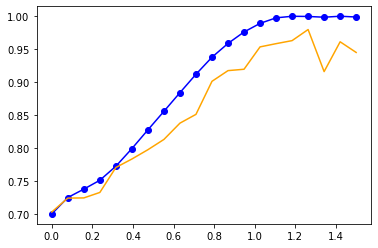

In [5]:
with open('sqrtSWAP_10MHz_curveData.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    rows = [row for row in csv_reader][1:]
    rows_data = [[float(i) for i in row] for row in rows]
    print(rows_data)
    T = [row[0] for row in rows_data]
    F_opt_CNOT = [row[1] for row in rows_data]
    F_exp_CNOT_mean = [row[2] for row in rows_data]
    F_exp_CNOT_std = [row[3] for row in rows_data]
    plt.errorbar(x=T,
                 y=F_exp_CNOT_mean,
                 yerr=F_exp_CNOT_std,
                 fmt='-', color='orange', label='F Exp/CNOT')
    plt.plot(T, F_opt_CNOT, 'bo-', label='F Optimizer/CNOT')

# ZZ Exp Vs Theory

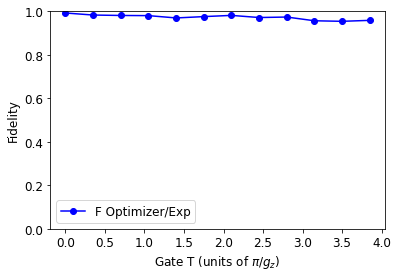

In [10]:
gateName = 'ZZ'
date = '2022-03-09_0'
gateIndices = range(12)
basePath = Path('.') / 'ExpData' / gateName

gateDataVals = gateData(gateName, basePath, date, gateIndices)
tomos = getTomos(basePath, date, gateIndices, gateDataVals)

purityData = [['T', 'Exp Purity']]\
                +[[str(round(i,5)) for i in [gateDataVals['G_T_theory'][i],
                                             tomos[i].purity]]
                             for i in range(len(gateDataVals['G_T_theory']))]
np.savetxt(gateName + '_purities.csv', purityData, delimiter=",", fmt='%s')

IFdict = IFs(basePath, date, gateIndices, gateDataVals, tomos)

plt.rcParams.update({'font.size': 12})
plt.plot(gateDataVals['G_T_theory'], 1-IFdict['G_IF_Exp_Theory'], 'bo-', label='F Optimizer/Exp')
plt.legend()
plt.xlabel('Gate T (units of $\pi/g_z$)')
plt.ylabel('Fidelity')
plt.ylim(0,1)
plt.savefig(gateName +'.png', format='png', dpi=600, bbox_inches='tight')
plt.show()

# Gate Exp Vs Theory

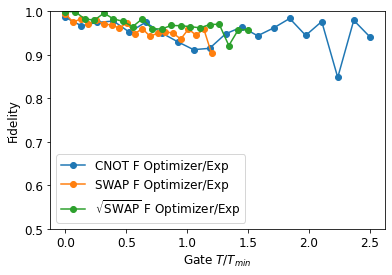

In [7]:
gateIndices = range(20)
for exp in exps:
    gateName, rabiStrengthMHz = exp
    if gateName == 'sqrtSWAP':
        labelGateName = '$\sqrt{\mathrm{SWAP}}$'
    else:
        labelGateName = gateName

    date, basePath = expLocation(gateName, rabiStrengthMHz)
    gateDataVals = gateData(gateName, basePath, date, gateIndices)
    tomos = getTomos(basePath, date, gateIndices, gateDataVals)
    IFdict = IFs(basePath, date, gateIndices, gateDataVals, tomos)

    plt.plot(gateDataVals['G_T_theory'], 1-IFdict['G_IF_Exp_Theory'], 'o-', label=labelGateName+' F Optimizer/Exp')
    plt.legend()
    plt.xlabel('Gate T (units of $\pi/g_z$)')
    plt.ylabel('Fidelity')
    plt.ylim(0.5,1)
    plt.xlabel('Gate $T/T_{min}$')
plt.savefig('gateExpVsTheory.png', format='png', dpi=600, bbox_inches='tight')
plt.show()